In [30]:
import pandas as pd
import os
from etl_defs import clean_dataframes
import altair as alt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [31]:
#Carregamento de Ds
products = pd.read_csv("./d_bemol/datasets/olist_products_dataset.csv")
items = pd.read_csv("./d_bemol/datasets/olist_order_items_dataset.csv")
orders = pd.read_csv("./d_bemol/datasets/olist_orders_dataset.csv")
payments = pd.read_csv("./d_bemol/datasets/olist_order_payments_dataset.csv")
reviews = pd.read_csv("./d_bemol/datasets/olist_order_reviews_dataset.csv")
customer = pd.read_csv("./d_bemol/datasets/olist_customers_dataset.csv")
sellers = pd.read_csv("./d_bemol/datasets/olist_sellers_dataset.csv")
geoloc = pd.read_csv("./d_bemol/datasets/olist_geolocation_dataset.csv")


In [32]:
#Removendo valores nulos
dfs = [products, items, orders, payments, reviews, customer, sellers, geoloc]
colun=['order_id', 'customer_id', 'product_id', 'seller_id', 'zip_code_prefix']
dfs_clean = clean_dataframes(dfs, colun)
products, items, orders, payments, reviews, customer, sellers, geoloc = dfs_clean
display(orders)
#Removendo vendas não concluídas
orders = orders[orders['order_status'] == 'delivered']
display(orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [33]:
# 1-b Análise de Performance de Vendas

df_items = items[['order_id', 'order_item_id']]

df_items = df_items.loc[df_items.groupby('order_id')['order_item_id'].idxmax()]

df_items = pd.merge(df_items[['order_id', 'order_item_id']], orders[['order_id', 'order_approved_at']], on='order_id')

#Tratamento para o gráfico
df_items = df_items.rename(columns={'order_item_id': 'Quantidade', 'order_approved_at': 'Data'})
df_items.dropna(subset=['Data'], inplace=True)
df_items['Data'] = pd.to_datetime(df_items['Data'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_items.dropna(subset=['Data'], inplace=True)

display(df_items)

,order_id,Quantidade,Data
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-04 14:10:13
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,1,2018-04-25 04:11:01
96474,fffcd46ef2263f404302a634eb57f7eb,1,2018-07-17 04:31:48
96475,fffce4705a9662cd70adb13d4a31832d,1,2017-10-24 17:14:25
96476,fffe18544ffabc95dfada21779c9644f,1,2017-08-15 00:04:32


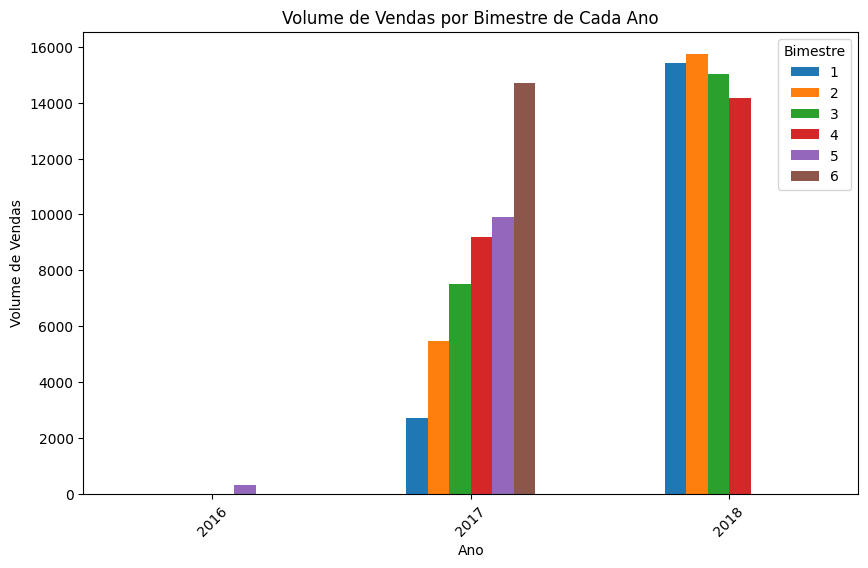

In [34]:
#Gráfico volume de vendas
# Agrupar os dados por ano e bimestre e calcular o volume de vendas
df_items['Ano'] = df_items['Data'].dt.year
df_items['Bimestre'] = (df_items['Data'].dt.month - 1) // 2 + 1
df_vendas_bimestrais = df_items.groupby(['Ano', 'Bimestre'])['Quantidade'].sum().unstack()


df_vendas_bimestrais.plot(kind='bar', figsize=(10, 6))
plt.title('Volume de Vendas por Bimestre de Cada Ano')
plt.xlabel('Ano')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Bimestre')

plt.show()

In [35]:
#2-a	Análise de logística / Prazos de Entrega


df_entregas = pd.merge(orders[['customer_id','order_delivered_customer_date', 'order_estimated_delivery_date']],
                     customer[['customer_id', 'customer_state']],
                     on='customer_id')

estados_abrev = {'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
                'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
                'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
                'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
                'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
                'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
                'SE': 'Sergipe', 'TO': 'Tocantins'}

df_entregas = df_entregas.dropna()
df_entregas['customer_state'] = df_entregas['customer_state'].replace(estados_abrev)
df_entregas['order_delivered_customer_date'] = pd.to_datetime(df_entregas['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
df_entregas['order_estimated_delivery_date'] = pd.to_datetime(df_entregas['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

df_entregas = df_entregas.rename(columns={'order_delivered_customer_date': 'data_da_entrega', 'order_estimated_delivery_date': 'previsao_de_entrega', 'customer_state': 'Estado_de_entrega'})
                                    

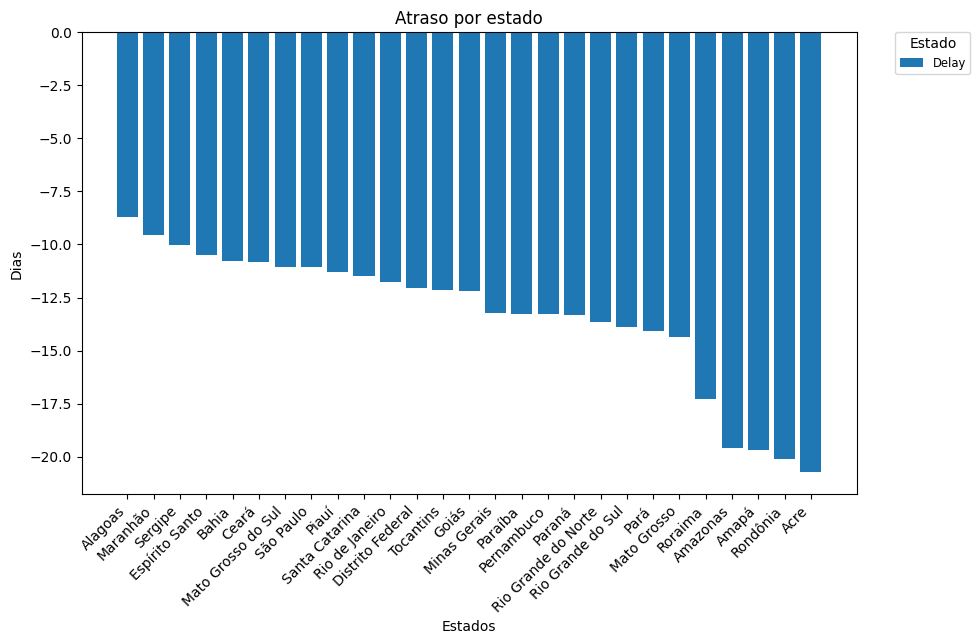

In [41]:
#Gráfico de delay por estado
df_entregas['delay'] = (df_entregas['data_da_entrega'] - df_entregas['previsao_de_entrega']).dt.days
state_delay = df_entregas.groupby('Estado_de_entrega')['delay'].mean().sort_values(ascending=False)
state_avg_time = df_entregas.groupby('Estado_de_entrega')['data_da_entrega'].mean().sort_values(ascending=False)

# delay
plt.figure(figsize=(10,6))
plt.bar(state_delay.index, state_delay.values, label='Delay')
plt.xlabel('Estados')
plt.ylabel('Dias')
plt.title('Atraso por estado')

# Move a legenda para o canto superior esquerdo e a torna vertical
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Estado', fontsize='small', title_fontsize='medium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed

plt.show()


In [37]:
# 3-a.	Análise de Satisfação do Cliente

valid_scores = [0, 1, 2, 3, 4, 5]
reviews = reviews[reviews['review_score'].isin(valid_scores)]

df_review = pd.merge(orders, reviews[['order_id', 'review_score']], on='order_id')
df_review = df_review [['order_id', 'review_score']]

df_review = pd.merge(df_review, items[['order_id', 'product_id']], on ='order_id')
df_review = df_review [['order_id', 'review_score', 'product_id']]

df_review = pd.merge(df_review, products[['product_id', 'product_category_name']], on='product_id', how='left')

dfs = [df_review]
colun = ['product_category_name']
df_clean = clean_dataframes(dfs, colun)
df_review = df_clean[0]

df_review = df_review.drop(['order_id', 'product_id'], axis=1)

df_review = df_review.rename(columns={'review_score': 'Avaliação', 'product_category_name': 'Categorias'})

1533 valores nulos na coluna product_category_name serão removidos.


In [38]:
# Agrupar os dados por categoria e calcular a média de avaliação
top_cat = df_review.groupby('Categorias')['Avaliação'].mean().sort_values(ascending=False).head(10)
low_cat = df_review.groupby('Categorias')['Avaliação'].mean().sort_values(ascending=True).head(10)

top_cat_graf = alt.Chart(top_cat.reset_index()).mark_bar(size=20, color='skyblue', strokeWidth=0).encode(
    x=alt.X('Categorias:N', title='Categoria'),
    y=alt.Y('mean(Avaliação):Q', title='Média de Avaliação'),
).properties(title='As 10 categorias com as maiores notas')

low_cat_graf = alt.Chart(low_cat.reset_index()).mark_bar(size=20, color='salmon', strokeWidth=0).encode(
    x=alt.X('Categorias:N', title='Categoria'),
    y=alt.Y('mean(Avaliação):Q', title='Média de Avaliação'),
).properties(title='As 10 categorias com as menores notas')

top_cat_graf | low_cat_graf

alt.HConcatChart(...)

In [39]:
# 4-a	Análise Financeira / Análise de Lucratividade por Categoria
#tratamento de dados
df_produtos = df_items[['order_id', 'Quantidade']]
df_produtos = df_produtos.merge(items[['order_id', 'product_id', 'freight_value']], on='order_id', how='left')
df_produtos = df_produtos.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
df_produtos = pd.merge(df_produtos, payments, on='order_id', how='inner')
df_produtos['preco_produto'] = df_produtos['payment_value'] - df_produtos['freight_value']
df_produtos['custo_produto'] = df_produtos['preco_produto'] * 0.8
df_produtos = df_produtos[['Quantidade', 'product_category_name', 'payment_type', 'payment_value', 'preco_produto', 'custo_produto']]
df_produtos = df_produtos.dropna(subset=['product_category_name'])

df_produtos['lucratividade'] = df_produtos['payment_value'] - df_produtos['custo_produto']

df_produtos = df_produtos[df_produtos['payment_type'] != 'voucher']

df_produtos = df_produtos.sort_values(by='lucratividade', ascending=False)

top_produtos = df_produtos.head(20)


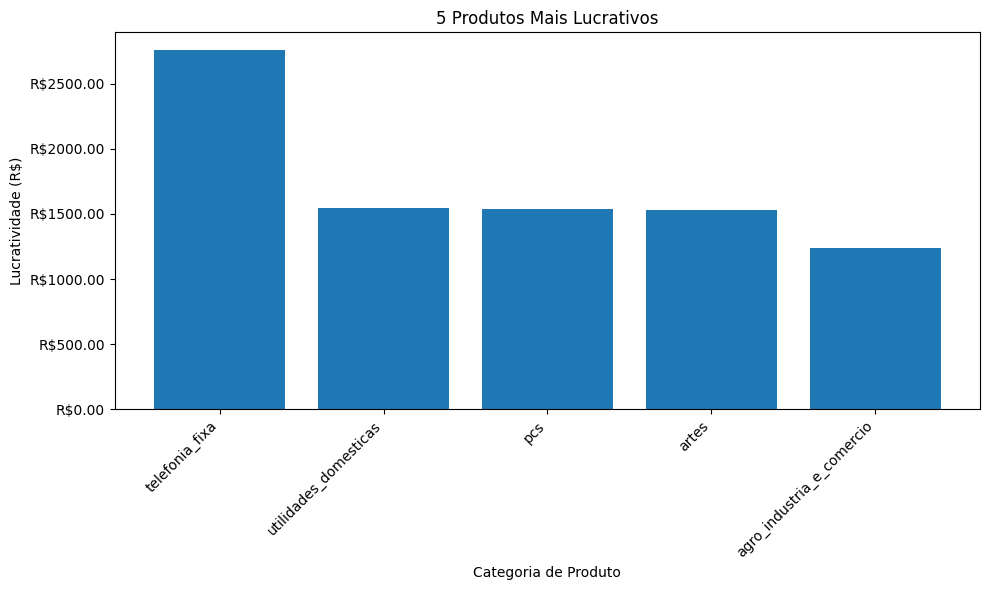

In [40]:
#grafico 5 produtos mais lucrativos

plt.figure(figsize=(10, 6))
plt.bar(top_produtos['product_category_name'], top_produtos['lucratividade'])
plt.xlabel('Categoria de Produto')
plt.ylabel('Lucratividade (R$)')
plt.title('5 Produtos Mais Lucrativos')
plt.xticks(rotation=45, ha='right')

# Adicionar o símbolo de moeda "R$" ao eixo y
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('R$%.2f'))

plt.tight_layout()
plt.show()